<a href="https://colab.research.google.com/github/piaseckazaneta/CV/blob/master/regresja_przestrzenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install geopandas pysal matplotlib seaborn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
import pandas as pd

# Wczytaj dane
df = pd.read_csv('./air_quality_probka.csv')

# Sprawdź, jak wyglądają dane
print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  
0    

In [4]:
import geopandas as gpd
from shapely.geometry import Point

# Zakładając, że dane zawierają kolumny 'latitude' i 'longitude'
df['geometry'] = df.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

# Tworzymy GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Ustawienie układu współrzędnych (EPSG 4326 - standardowy układ WGS84)
gdf = gdf.set_crs('EPSG:4326')

# Sprawdź dane
print(gdf.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2              Brazil  Presidente Dutra         41         Good             1   
3               Italy   Priolo Gargallo         66     Moderate             1   
4              Poland         Przasnysz         34         Good             1   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good                5               Good              1   
3            Good               39               Good              2   
4            Good               34               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category      lat      lng  \
0   

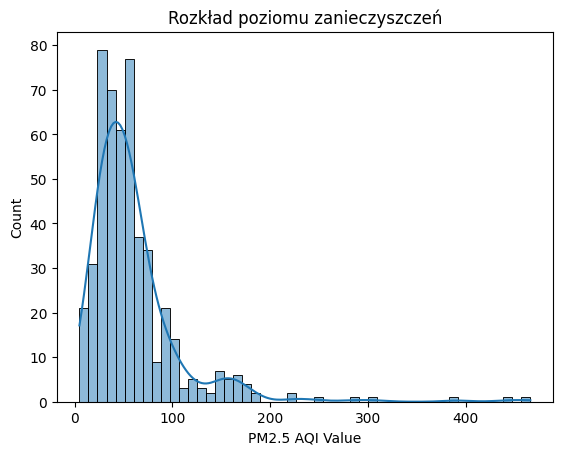

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Podstawowa analiza zmiennych, np. rozkład poziomów zanieczyszczeń
sns.histplot(gdf['PM2.5 AQI Value'], kde=True)
plt.title('Rozkład poziomu zanieczyszczeń')
plt.show()

In [6]:
!pip install libpysal esda
import libpysal as lp
import esda as es

# Tworzenie macierzy sąsiedztwa opartych na najbliższych sąsiadach (k=5)
w = lp.weights.KNN.from_dataframe(gdf, k=5)

# Row-standardize the weights matrix
w.transform = 'r'  # Apply row-standardization


# Sprawdzenie macierzy sąsiedztwa
w.neighbors

/usr/local/lib/python3.11/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


{0: [261, 8, 183, 219, 473],
 1: [335, 291, 251, 98, 2],
 2: [316, 88, 95, 281, 319],
 3: [286, 12, 400, 211, 309],
 4: [14, 279, 424, 89, 44],
 5: [485, 197, 85, 284, 97],
 6: [239, 432, 230, 162, 381],
 7: [421, 454, 171, 170, 420],
 8: [261, 219, 0, 183, 473],
 9: [389, 173, 452, 204, 132],
 10: [401, 46, 415, 201, 271],
 11: [440, 69, 36, 121, 420],
 12: [3, 400, 286, 211, 309],
 13: [393, 47, 38, 412, 486],
 14: [4, 424, 279, 89, 419],
 15: [30, 395, 99, 237, 225],
 16: [262, 438, 141, 50, 37],
 17: [444, 304, 278, 154, 382],
 18: [475, 477, 195, 108, 476],
 19: [241, 336, 398, 124, 436],
 20: [102, 114, 186, 248, 45],
 21: [111, 274, 146, 112, 127],
 22: [322, 165, 209, 260, 305],
 23: [323, 75, 489, 93, 395],
 24: [449, 44, 92, 279, 4],
 25: [429, 376, 461, 188, 315],
 26: [35, 294, 410, 353, 370],
 27: [70, 167, 142, 318, 40],
 28: [367, 394, 38, 221, 273],
 29: [347, 384, 325, 34, 282],
 30: [395, 15, 237, 84, 99],
 31: [118, 131, 153, 481, 482],
 32: [377, 330, 333, 471, 332]

In [7]:
from pysal.model import spreg

# Przygotowanie zmiennych zależnych i niezależnych
y = gdf['PM2.5 AQI Value']  # Poziom zanieczyszczenia (zmienna zależna)
X = gdf[['lng', 'lat']]  # Współrzędne geograficzne (zmienne niezależne)

# Tworzymy model regresji przestrzennej (Model opóźniony - Lag model)
model = spreg.ML_Lag(y, X, w=w)

# Wyniki modelu
print(model.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PM2.5 AQI Value                Number of Observations:         499
Mean dependent var  :     59.9699                Number of Variables   :           4
S.D. dependent var  :     49.4961                Degrees of Freedom    :         495
Pseudo R-squared    :      0.5258
Spatial Pseudo R-squared:  0.0256
Log likelihood      :  -2507.9559
Sigma-square ML     :   1208.7497                Akaike info criterion :    5023.912
S.E of regression   :     34.7671                Schwarz criterion     :    5040.762

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------

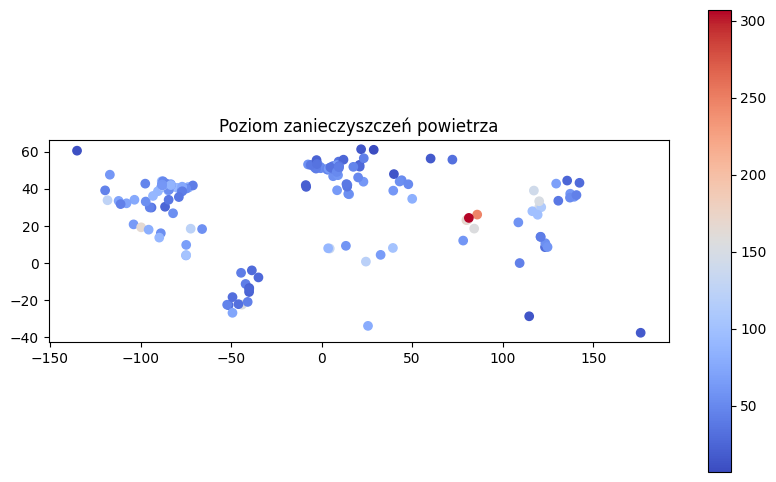

In [26]:
# Wizualizacja poziomu zanieczyszczeń na mapie
gdf.plot(column='PM2.5 AQI Value', cmap='coolwarm', legend=True, figsize=(10, 6))
plt.title('Poziom zanieczyszczeń powietrza')
plt.show()

In [9]:
# Wyniki modelu (statystyki, współczynniki)
print(model.summary)

# Obliczanie R^2 - using the correct attribute/method for ML_Lag
# Assuming 'pr2' represents the pseudo R-squared for this model
r_squared = model.pr2
print(f'Pseudo R^2: {r_squared}')

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :PM2.5 AQI Value                Number of Observations:         499
Mean dependent var  :     59.9699                Number of Variables   :           4
S.D. dependent var  :     49.4961                Degrees of Freedom    :         495
Pseudo R-squared    :      0.5258
Spatial Pseudo R-squared:  0.0256
Log likelihood      :  -2507.9559
Sigma-square ML     :   1208.7497                Akaike info criterion :    5023.912
S.E of regression   :     34.7671                Schwarz criterion     :    5040.762

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------